<a href="https://colab.research.google.com/github/Sar314/1D_heat_eqn/blob/main/heat%20equation%20with%20source%20backward%20difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1D Heat equation solved implicity using a backward difference approximation in time.

This version has a Neuman boundary condition at x=0, and  Dirchelet boundary condition at x=L.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

In [28]:
# variables
L = np.pi   # rod length (3 in this case so that the final plot is symmetric and shows the oscillations from the initial conditions)
T = .3      # total time (s)
k = .5      # thermal diffusivity constant  
N = 50      # number of spatial steps
M = 50      # number of time steps
dx = L/N    # space steps
dt = T/M    # time steps
alpha = k*dt/dx**2
t_bound1 = 0.5 # constant value of U(L,t) for Dirchelet condition
t_bound2 = 1   # constant value of the dU(0,t)/dx for Neuman Condition

x = np.linspace(0,L,N)
t = np.linspace(0,T,M)

In [29]:
# Initial condition
u_0 = np.zeros((N,1))

for i in range(N):
  u_0[i] = np.sin(np.pi*x[i])

# Boundary Conditions just for initial u, the rest are included in the matrix equation below
u_0[-1] = t_bound1   # Dirchelet
u_0[0] = u_0[1]      # Neuman


In [30]:
# Creating the inverted matrix A including Dirchelet and Neuman boundary conditions

matrix = np.array([-alpha*np.ones(N-1), (1 + 2*alpha)*np.ones(N), -alpha*np.ones(N-1)], dtype=object)
offset = [-1,0,1]
A = diags(matrix,offset).toarray()
A[1, 2] = -2*alpha
Inv_A = np.linalg.inv(A)

# Creating the b vector which results from the boundary conditions

b = np.zeros((N, 1), dtype=object)
b[0], b[-1] = 2*t_bound2*alpha*dx, alpha*t_bound1


In [31]:
############################# Source ###############################
def S(x):                                 # Gaussian Source 
  sigma = 0.3                             # FWHM
  return np.exp(-(x-1.5)**2/(2*sigma))    # centered at 1.5

def H(x):                                 # Step function source
  h = np.heaviside(x-2,0.5)               # step up at x=2
  return h

# source vector
s = np.zeros((N,1), dtype=object)
for i in range(N):
  s[i] = H(x[i])
####################################################################

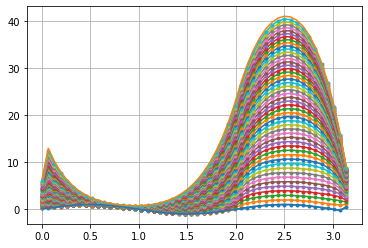

In [33]:
# Heat equation in terms of approximations with boundary conditions
# reseting u_0 for each run
for i in range(N):
  u_0[i] = np.sin(np.pi*x[i])

# Boundary Conditions just for initial u, the rest are included in the matrix equation below
u_0[-1] = t_bound1   # Dirchelet
u_0[0] = u_0[1]     # Neuman

u_1 = np.zeros((N, 1))
u = np.zeros((M,N))
u_out = [u_0]

for j in range(M):  # M steps in time
  u_1 = np.matmul(Inv_A, (u_0 + b + s)) 
  #u[j,:] = np.transpose(u_0)
  plt.plot(x,u_0, ".-")
  u_out.append(u_1)
  u_0 = u_1   # update u_0 and loop back

plt.plot(x,u_out[0])
plt.plot(x,u_out[-1])
plt.grid()